<h1> <center><u> Adversarial attacks</u> </center></h1>


In [112]:
# Библиотеки для работы с нейронными сетями
import tensorflow as tf
import random

# Библиотеки для управления данными
import numpy as np
import pandas as pd	

# Библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# Импортируем встроенный в tensorflow датасет MNIST
mnist = tf.keras.datasets.mnist

# Разделение данных на тренировочные и тестовые
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Провека размерности данных
x_train.shape, x_test.shape

# Нормализация данных путем деления их на 255 потому что значения пикселя могут варьироваться от 0 до 255
x_train, x_test = x_train / 255.0, x_test / 255.0

<h3> Полная проверка и форматирование датасета <h3>

In [114]:
# Объединение обучающих и тестовых массивов x, y в фрейм данных pandas для EDA

# Разворачивание набора данных таким образом, чтобы каждая строка содержала
# информацию о пикселях каждого изображения, и сохранение во фрейме данных

# Использование функции reshape для преобразования 3d-массива в 2d
# Количество строк остается прежним, матрица 28 * 28, содержащая информацию о пикселях,
# разворачивается в одну строку
mnist_train = pd.DataFrame(x_train.reshape(x_train.shape[0], 
                                           x_train.shape[1] * x_train.shape[2]))

# Аналогичная операция для тестовых данных
mnist_test = pd.DataFrame(x_test.reshape(x_test.shape[0], 
                                           x_test.shape[1] * x_test.shape[2]))

# Создание списка имен столбцов
colnames = ['Pixel'+str(i) for i in range(1,785)]

mnist_train.columns = colnames
mnist_test.columns = colnames

# Добавление столбца с метками классов
mnist_train['label'] = y_train
mnist_test['label'] = y_test

mnist_train.head()

,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,Pixel10,...,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,Pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [115]:
# Проверка на наличие пропущенных значений
mnist_train.isnull().values.sum()

0

[Text(0.5, 1.0, 'Label distribution in Training Data')]

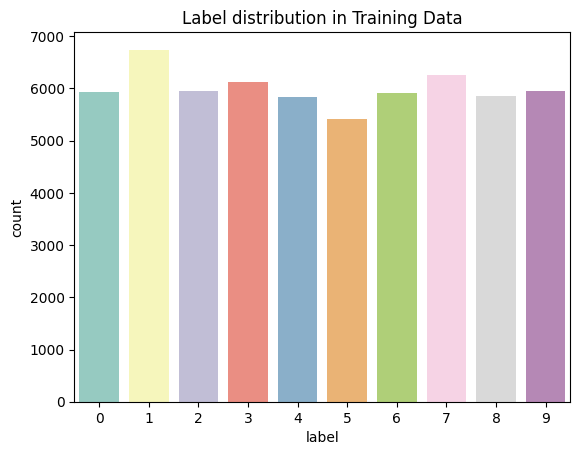

In [116]:
# Проверка распределения меток в обучающем наборе данных
sns.countplot(x="label", data=mnist_train, palette="Set3").set(
    title="Label distribution in Training Data")

[Text(0.5, 1.0, 'Label distribution in Test Data')]

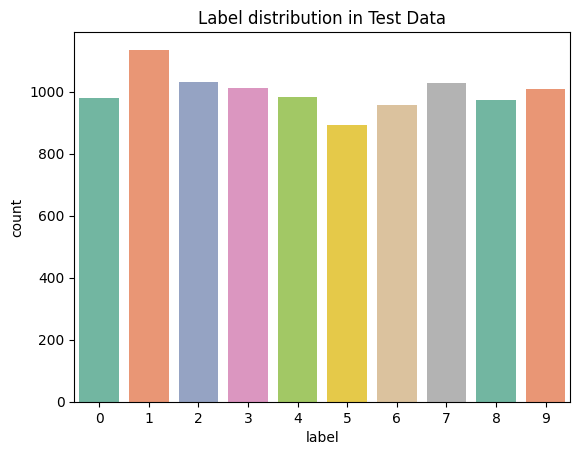

In [117]:
# Проверка распределения меток в тестовом наборе данных
sns.countplot(x="label", data=mnist_test, palette="Set2").set(
    title="Label distribution in Test Data")

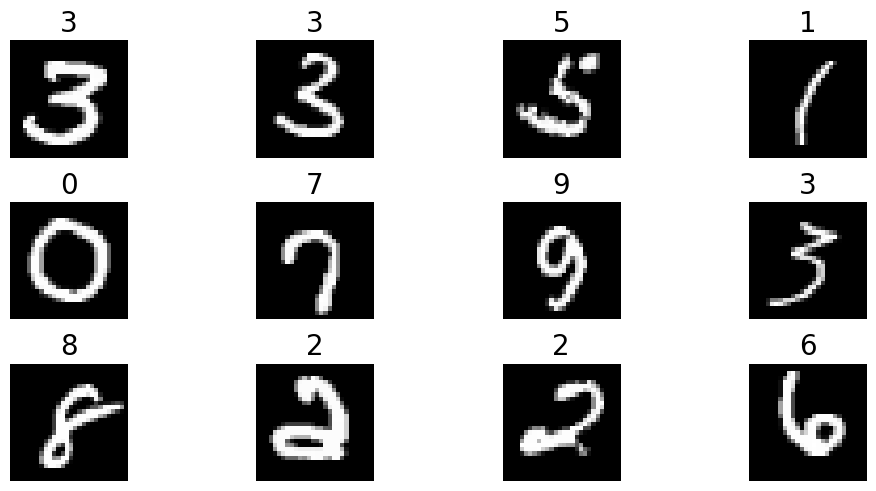

In [118]:
# Отображение некоторых изображений из набора данных train
# Отображаем по 4 изображения в каждой строке
fig, axes = plt.subplots(3,4, figsize=(10,5))

# Установка расстояния между изображениями
fig.tight_layout()
axes = axes.flatten()

# Генерируем 12 случайных номеров строк для выбора из фрейма данных mnist_train
idx = np.random.randint(0,mnist_train.shape[0],size=12)
for i in range(12):
    pixel_data = mnist_train.iloc[idx[i]]
    axes[i].imshow(np.array(pixel_data[:784]).reshape(28,28), cmap='gray')
    axes[i].axis('off') 
    axes[i].set_title(str(int(pixel_data[-1])), color= 'black', fontsize=20)
    

<h4><center><u> Модели </center></u><h/4>

<h4> XGBOOST </h4>

In [119]:
# Инициализация XGBoost
# Импорт библиотеки XGBoost
import xgboost as xb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Разделение обучающего набора данных на обучающий и валидационный
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train, 
                                                  test_size=0.1)

# Все структуры массива numpy должны быть преобразованы в структуру DMatrix
# для оптимального использования в XGBoost
# преобразование x_train, x_val и x_test в 2d-матрицу
xgb_train_matrix = xb.DMatrix(x_train.reshape(x_train.shape[0], 
                                    x_train.shape[1] * x_train.shape[2]), 
                              label=y_train)

xgb_val_matrix = xb.DMatrix(x_val.reshape(x_val.shape[0], 
                                    x_val.shape[1] * x_val.shape[2]), 
                              label=y_val)

xgb_test_matrix = xb.DMatrix(x_test.reshape(x_test.shape[0], 
                                    x_test.shape[1] * x_test.shape[2]), 
                              label=y_test)

# Установка гиперпараметров модели
params = {
    'max_depth': 10,                # максимальная глубина каждого дерева
    'eta': 0.7,                     # шаг обучения для каждой итерации
    'objective': 'multi:softmax',   # многоклассовая классификация с использованием цели softmax
    'num_class': 10,                # метки варьируются от 0 до 9, поэтому num_classes равно 10
    'eval_metric': ['merror' ,      # показатель оценки как среднеквадратичная ошибка
                    'mlogloss']     # и жарналирование потерь
}  

results = {}
xgb_model = xb.train(params, xgb_train_matrix, evals=[(xgb_train_matrix, 'train'),
                                                      (xgb_val_matrix, 'val')],
                     num_boost_round=10,
                     evals_result = results,
                     verbose_eval=True)

y_pred = xgb_model.predict(xgb_test_matrix)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	train-merror:0.05770	train-mlogloss:0.43155	val-merror:0.10417	val-mlogloss:0.55888
[1]	train-merror:0.02300	train-mlogloss:0.23688	val-merror:0.07867	val-mlogloss:0.39717
[2]	train-merror:0.01322	train-mlogloss:0.13764	val-merror:0.06750	val-mlogloss:0.30435
[3]	train-merror:0.00702	train-mlogloss:0.08236	val-merror:0.05967	val-mlogloss:0.24755
[4]	train-merror:0.00369	train-mlogloss:0.05072	val-merror:0.05483	val-mlogloss:0.21261
[5]	train-merror:0.00180	train-mlogloss:0.03229	val-merror:0.05000	val-mlogloss:0.18712
[6]	train-merror:0.00076	train-mlogloss:0.02129	val-merror:0.04767	val-mlogloss:0.16943
[7]	train-merror:0.00039	train-mlogloss:0.01501	val-merror:0.04567	val-mlogloss:0.15833
[8]	train-merror:0.00009	train-mlogloss:0.01081	val-merror:0.04250	val-mlogloss:0.14957
[9]	train-merror:0.00002	train-mlogloss:0.00805	val-merror:0.04050	val-mlogloss:0.14433
Accuracy: 96.11%


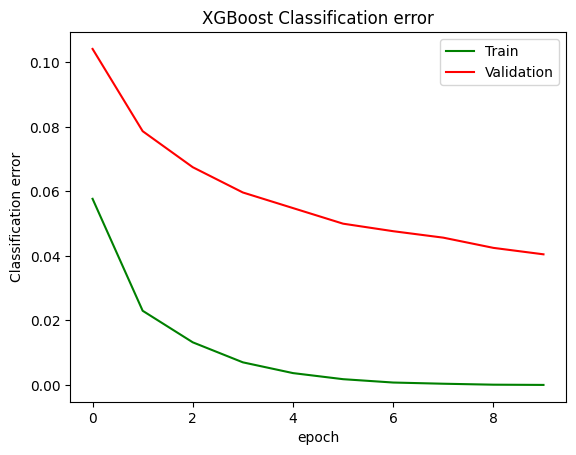

In [120]:
# Визуализация ошибки классификации
epochs = range(len(results['train']['merror']))
plt.plot(epochs,results['train']['merror'], color='green', label='Train' )
plt.plot(epochs,results['val']['merror'], color='red', label='Validation' )
plt.title('XGBoost Classification error')
plt.xlabel('epoch')
plt.ylabel('Classification error')
plt.legend()
plt.show()

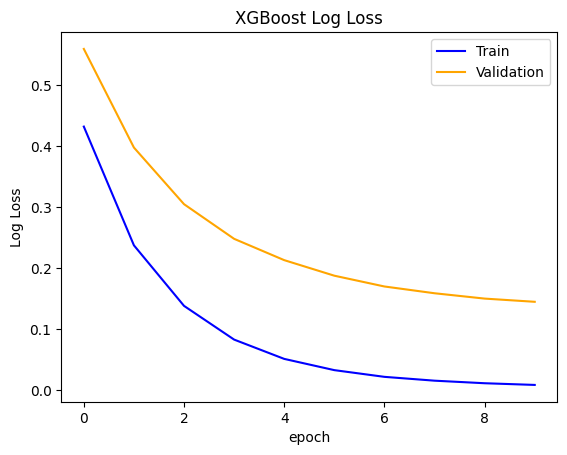

In [121]:
# Визуализация журналирования потерь
plt.plot(epochs,results['train']['mlogloss'], color='blue', label='Train' )
plt.plot(epochs,results['val']['mlogloss'], color='orange', label='Validation' )
plt.title('XGBoost Log Loss')
plt.xlabel('epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

<h4> CNN </h4>

In [122]:
# Импортирование библиотек для CNN
from keras.utils.np_utils import to_categorical  # convert to one-hot-encoding
from keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization, LeakyReLU, Reshape, Conv2DTranspose
from keras import optimizers
from keras import models

In [123]:
# Создание модели CNN

# Добавление размера канала к изображениям
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_val= np.expand_dims(x_val, axis=-1)

# Одно горячее кодирование всех меток
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_val = to_categorical(y_val,10)

cnn_model = models.Sequential()

cnn_model.add(Conv2D(filters=20, kernel_size=(5, 5), 
                   activation='relu', padding="same", 
                   input_shape=(28,28,1)))
cnn_model.add(BatchNormalization(axis=-1))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters=20, kernel_size=(4, 4), 
                   activation='relu', padding="same"))
cnn_model.add(BatchNormalization(axis=-1))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters=20, kernel_size=(4, 4), 
                   activation='relu', padding="same"))
cnn_model.add(BatchNormalization(axis=-1))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(200, activation='relu'))

cnn_model.add(Dense(10, activation='softmax'))

cnn_model_opt = optimizers.Adam(decay=1e-4)

print(cnn_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 20)        520       
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 20)       80        
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 28, 28, 20)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 20)        6420      
                                                                 
 batch_normalization_10 (Bat  (None, 28, 28, 20)       80        
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 28, 28, 20)       

In [124]:
# Компиляция и обучение модели CNN
cnn_model.compile(optimizer = cnn_model_opt , loss = "categorical_crossentropy", 
                  metrics=["accuracy"]) 

cnn_model_fit = cnn_model.fit(x_train, 
                        y_train,
                        validation_data = (x_val, y_val),
                        batch_size=128,
                        epochs=10)

cnn_test_accuracy = cnn_model.evaluate(x_test, y_test)
print("Accuracy on test data is : ", cnn_test_accuracy[1] * 100)

Epoch 1/10
422/422 [==============================] - 107s 253ms/step - loss: 0.1882 - accuracy: 0.9490 - val_loss: 0.1293 - val_accuracy: 0.9618
Epoch 2/10
422/422 [==============================] - 107s 253ms/step - loss: 0.0526 - accuracy: 0.9838 - val_loss: 0.0752 - val_accuracy: 0.9827
Epoch 3/10
422/422 [==============================] - 108s 256ms/step - loss: 0.0362 - accuracy: 0.9885 - val_loss: 0.0704 - val_accuracy: 0.9848
Epoch 4/10
422/422 [==============================] - 107s 253ms/step - loss: 0.0283 - accuracy: 0.9916 - val_loss: 0.0586 - val_accuracy: 0.9852
Epoch 5/10
422/422 [==============================] - 106s 250ms/step - loss: 0.0223 - accuracy: 0.9925 - val_loss: 0.0561 - val_accuracy: 0.9880
Epoch 6/10
422/422 [==============================] - 106s 251ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0711 - val_accuracy: 0.9860
Epoch 7/10
422/422 [==============================] - 107s 255ms/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0573 -

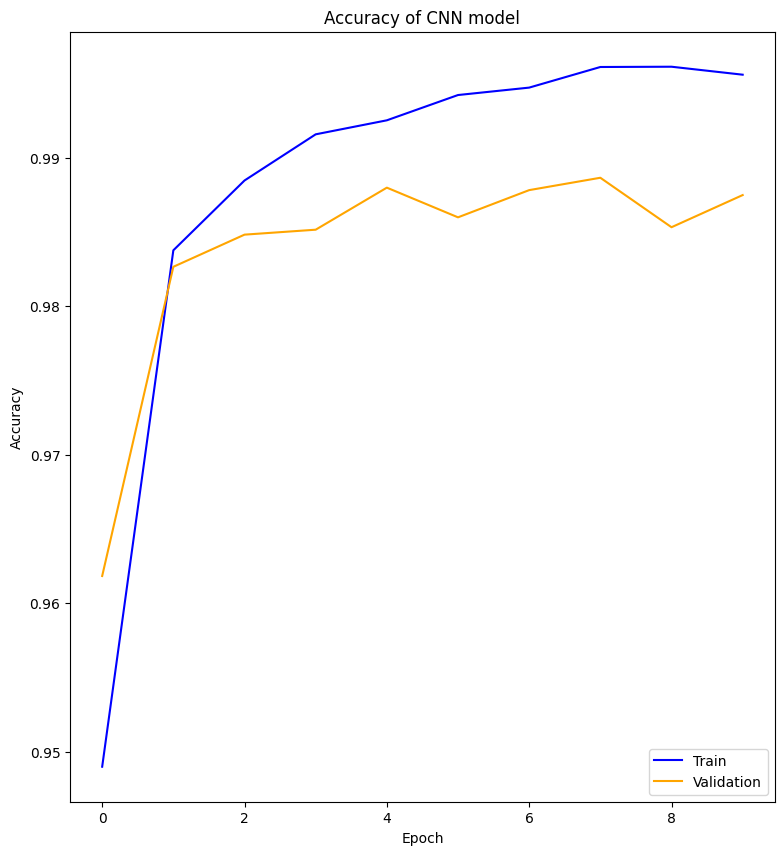

In [125]:
# Визуализация ошибки классификации
plt.figure(figsize=(20,10))
# Построение графика точности для набора данных train и validation
plt.subplot(1,2,1)
plt.plot(cnn_model_fit.history['accuracy'], color='blue', 
         label="Training accuracy")
plt.plot(cnn_model_fit.history['val_accuracy'], color='orange', 
         label="Validation accuracy")
plt.title("Accuracy of CNN model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="lower right")

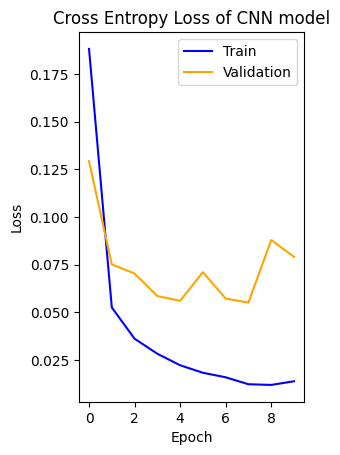

In [126]:
# Кросс-энтропийная потеря модели CNN

# Построение графика потерь для набора данных train и validation
plt.subplot(1,2,2)
plt.plot(cnn_model_fit.history['loss'], color='blue', 
         label="Training loss")
plt.plot(cnn_model_fit.history['val_loss'], color='orange', 
         label="Validation loss")
plt.title("Cross Entropy Loss of CNN model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper right")

In [127]:
# Визуализация примеров, которые были неправильно классифицированы
y_test_pred = cnn_model.predict(x_test)
errors = np.absolute(y_test_pred - y_test)
errors = [np.round(np.sum(each)) for each in errors]

# Проверка сгенерированных уникальных значений ошибок
set(errors)

313/313 [==============================] - 4s 12ms/step


{0.0, 1.0, 2.0}

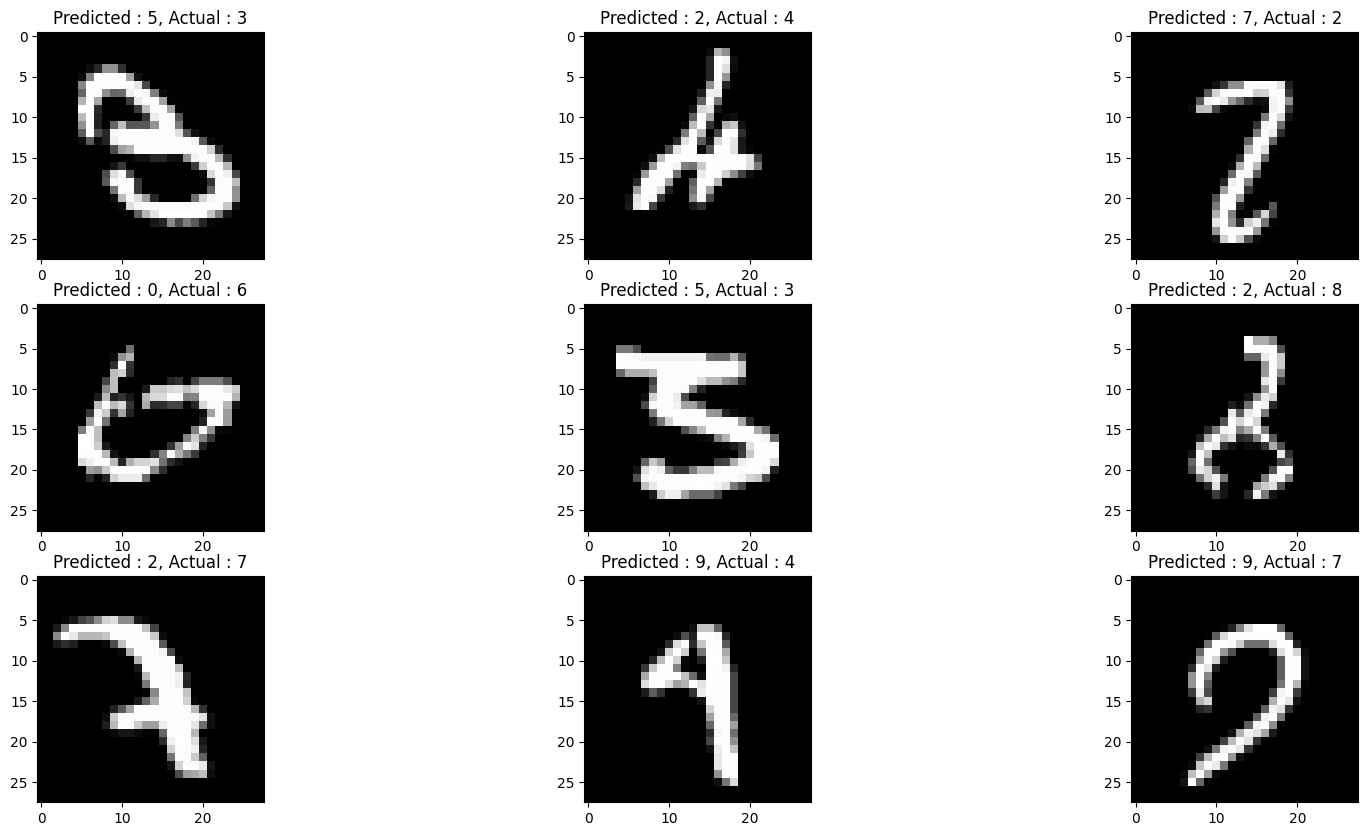

In [128]:
# Поскольку 2 - это максимальная разница в ошибках, извлечем эти индексы и проверим,
# совпадает ли индекс с максимальным значением в нашем прогнозе и тестовой метке,
# извлекающей максимальное значение из-за одной горячей кодировки
error_index = [i for i, x in enumerate(errors) if (x==2.0 and 
                                                       (np.argmax(y_test_pred[i])
                                                        !=
                                                        np.argmax(y_test[i])))]

# plot the images
plt.figure(figsize=(20,10))
for i,index in enumerate(error_index[:9]):
    plt.subplot(3,3,i+1)
    plt.title("Predicted : {}, Actual : {}".format(np.argmax(y_test_pred[index]),
                                                   np.argmax(y_test[index])))
    plt.imshow(np.reshape(x_test[index],(28,28)), cmap="gray")

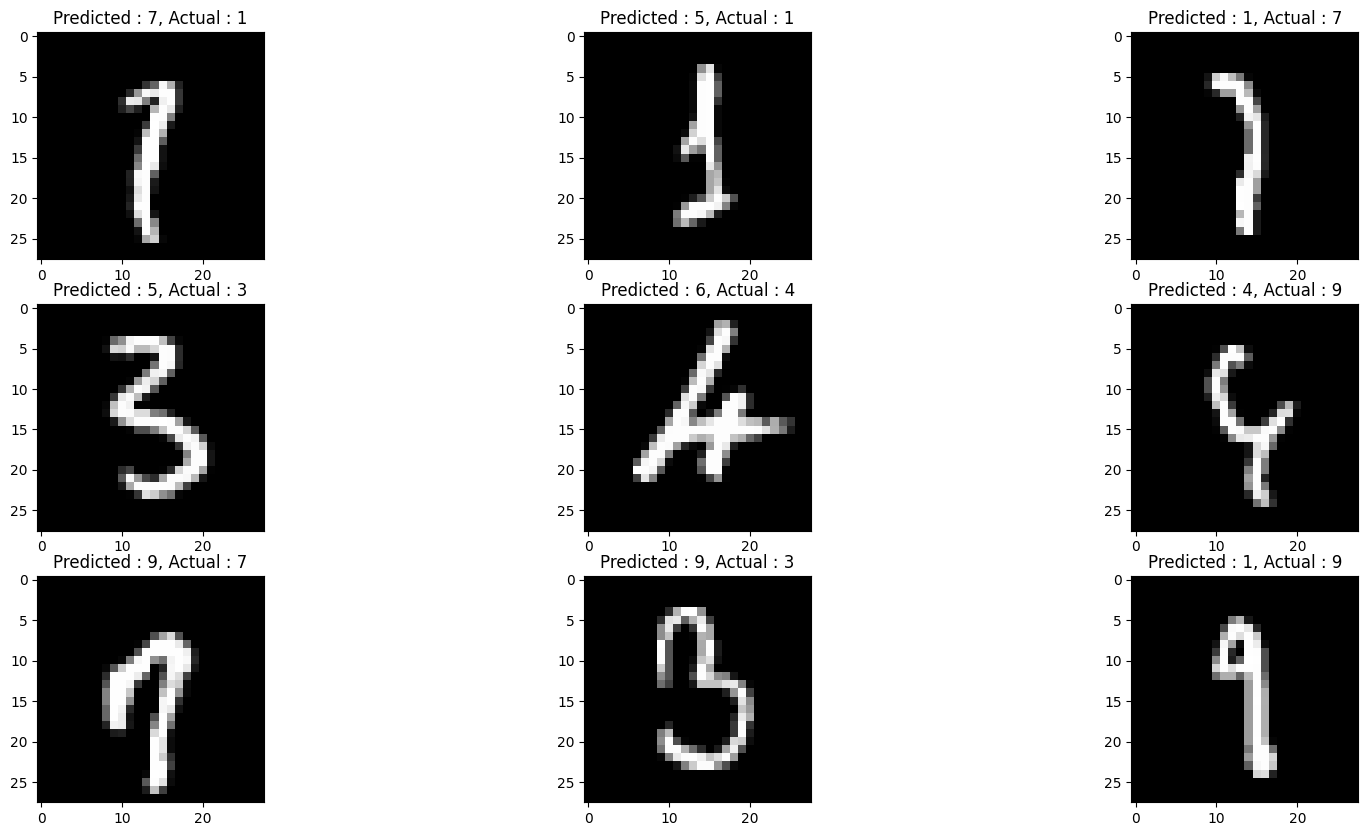

In [129]:
# Повторяем те же шаги, что и выше, где разница в ошибках равна 1,0
error_index = [i for i, x in enumerate(errors) if (x==1.0 and 
                                                       (np.argmax(y_test_pred[i])
                                                        !=
                                                        np.argmax(y_test[i])))]

# plot the images
plt.figure(figsize=(20,10))
for i,index in enumerate(error_index[:9]):
    plt.subplot(3,3,i+1)
    plt.title("Predicted : {}, Actual : {}".format(np.argmax(y_test_pred[index]),
                                                   np.argmax(y_test[index])))
    plt.imshow(np.reshape(x_test[index],(28,28)), cmap="gray")

<h4><center><u> Adversarial Attacks </h4></center></u>

<h4> FGSM </h4>

1/1 [==============================] - 0s 19ms/step


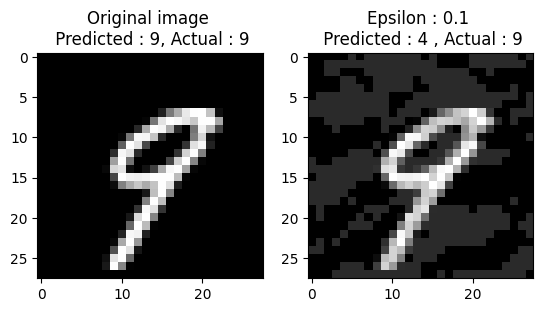

1/1 [==============================] - 0s 17ms/step


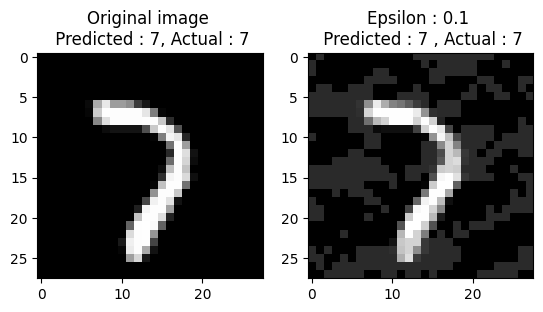

1/1 [==============================] - 0s 20ms/step


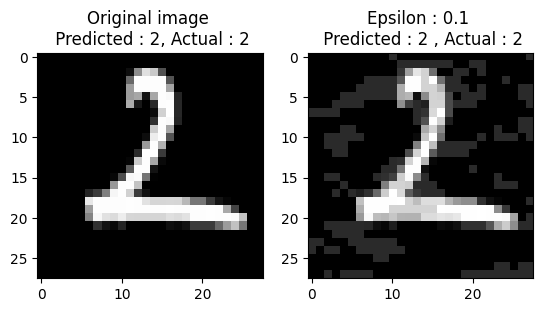

1/1 [==============================] - 0s 20ms/step


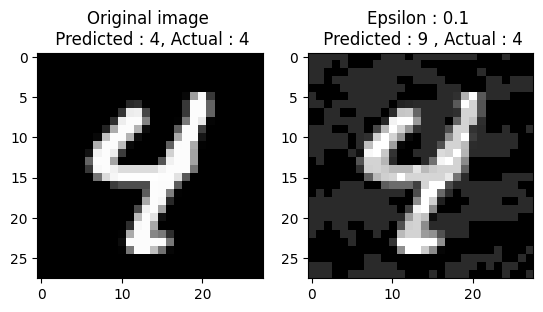

1/1 [==============================] - 0s 18ms/step


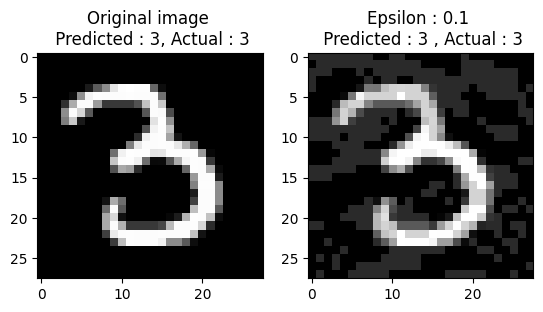

In [130]:
# Выборка всех тестовых случаев, которые были правильно предсказаны моделью. 

# Будем создавать состязательные примеры на основе этих данных изображений,
# чтобы показать, как различные типы атак сбивают с толку нейронную сеть и 
# неправильно классифицируют изображение
index_correctly_classified = [
    i for i, x in enumerate(errors)
    if (x == 0.0 and (np.argmax(y_test_pred[i]) == np.argmax(y_test[i])))
]

x_test_correctly_classified = x_test[index_correctly_classified]
y_test_correctly_classified = y_test[index_correctly_classified]

loss_object = tf.keras.losses.CategoricalCrossentropy()


def FGSM(model, image, label, eps):
    # Преобразуем изображение в float32
    image = tf.cast(image, tf.float32)
    # Запрашиваем tensorflow начать запись градиентов изображения
    with tf.GradientTape() as tape:
        tape.watch(image)
        # используем прогнозы модели для получения потерь
        pred = model(image)
        loss = loss_object(label, pred)
# Вычислим градиенты потерь для исходного изображения
    gradient = tape.gradient(loss, image)
    # получаем знак градиентов, который будет вектором -1,1 или 0
    signed_grad = tf.sign(gradient)
    # обновляем исходное изображение с помощью подписанных градиентов
    # Использование небольшого эпсилона гарантирует 
    # что изменения в изображении не будут видны человеческому глазу
    adversary = (image + (signed_grad * eps)).numpy()
    return adversary

# Случайным образом выбераем 5 изображений и запускаем на них fgsm-атаки
for i in random.sample(range(0, x_test_correctly_classified.shape[0]), 5):
    image = x_test_correctly_classified[i].reshape(1, 28, 28, 1)
    label = y_test_correctly_classified[i].reshape(1, 10)
    perturbed_image = FGSM(cnn_model, image, label, eps=0.1)
    predicted_label = np.argmax(cnn_model.predict(perturbed_image))
    actual_label = np.argmax(label)
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.title("Original image \n Predicted : {}, Actual : {}".format(
        np.argmax(label), actual_label))
    plt.imshow(np.reshape(x_test_correctly_classified[i], (28, 28)),
               cmap="gray")
    plt.subplot(1, 2, 2)
    plt.imshow(perturbed_image[0] * 0.5 + 0.5, cmap="gray")
    plt.title("Epsilon : 0.1 \n Predicted : {} , Actual : {}".format(
        predicted_label, actual_label))
    plt.show()

In [131]:
# Протестируем на xgboost последнее изображение, созданное в приведенном выше цикле

xgb_pred = xgb_model.predict(xb.DMatrix(perturbed_image.reshape(1,28*28)))
print("Actual label : {} , Predicted by XGboost : {}".format(actual_label,xgb_pred[0]))

Actual label : 3 , Predicted by XGboost : 3.0


<h4> Deepfool Attack </h4>

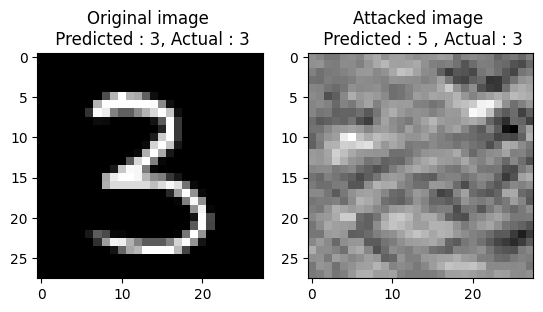

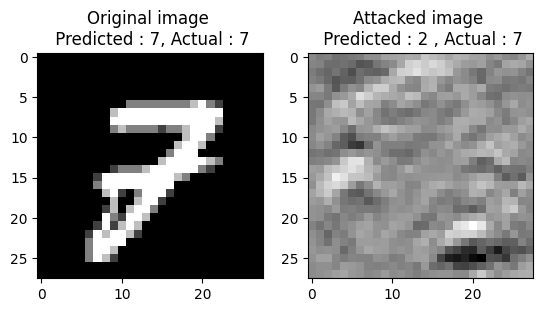

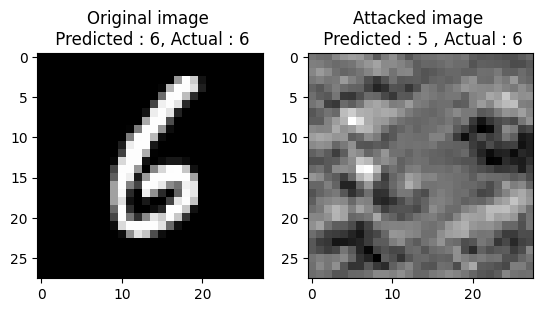

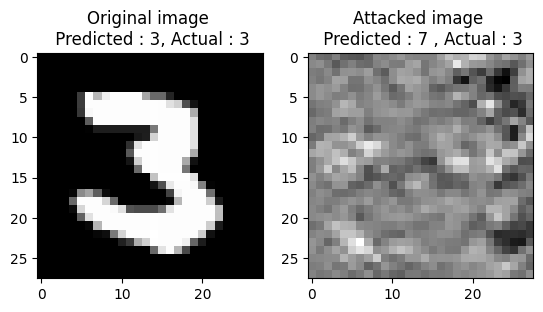

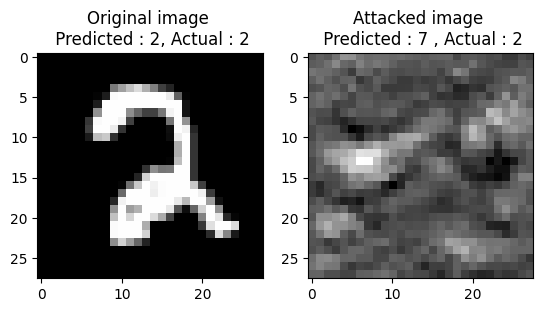

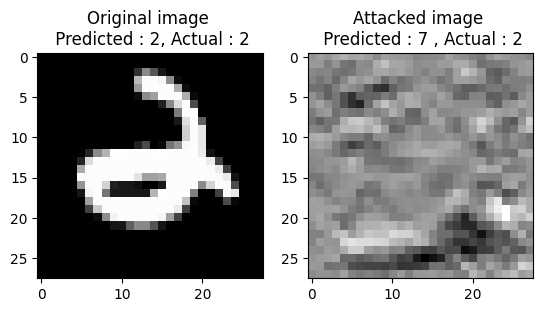

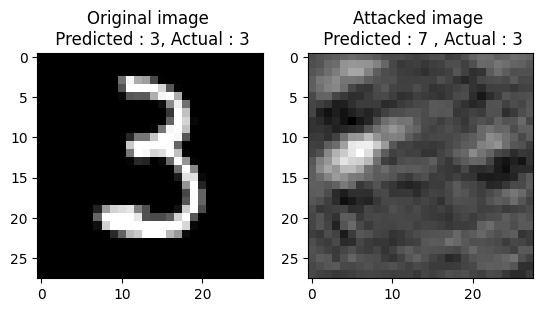

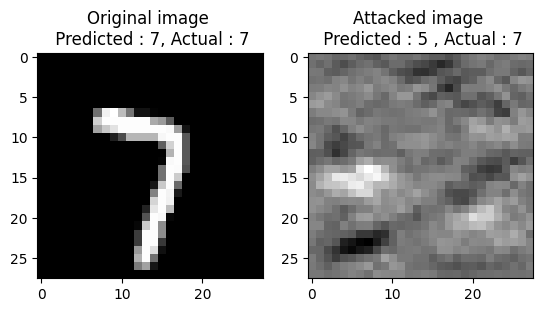

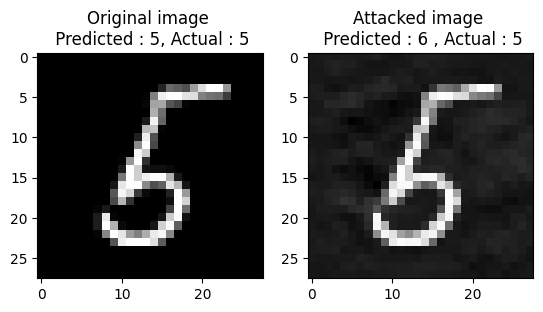

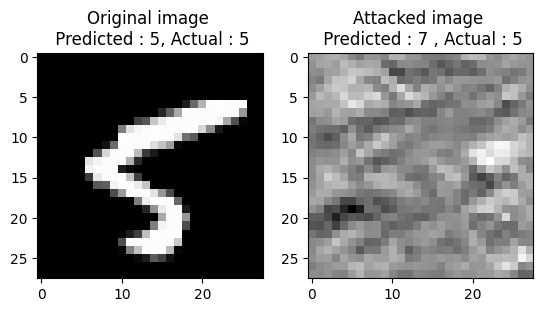

In [132]:
# Инициализируем атаку DeepFool
def DeepFool(image, model):
    # Преобразуем изображение в float32
    image = tf.cast(image , tf.float32)
    adversary= image
    x = tf.Variable(adversary)
    fs = model(x)
    # Модель дает вероятности, связанные с каждой меткой, мы сортируем их в порядке убывания
    # и сохраняем индексы. Это полезно для проецирования изображения на гиперплоскость
    # следующего ближайшего предсказания метки, чтобы проверить, не сбивает ли это с толку модель
    label_list = np.argsort(fs)[0][::-1]
    actual_label = label_list[0]
    
    # Установка начальное изменение градиента равным 0
    w = np.zeros(np.shape(image))
    # Установка возмущения изображения также 0
    r_tot = np.zeros(np.shape(image))

    iteration = 0
    
    # Начальная метка будет такой же, как и фактическая метка
    k_i = actual_label
    
    # Продолжаем цикл до тех пор, пока не произойдет изменение в предсказании метки до 100 итераций
    while (k_i == actual_label and iteration < 100):
        # Начальное возмущение установлено на бесконечность, поскольку мы хотим найти
        # Минимальное возмущение изображения для неправильной классификации
        pert = np.inf
        # Начинаем запись градиента изображения
        with tf.GradientTape() as tape:
            tape.watch(x)
            fs = model(x)
            # Потеря здесь принимается как логарифмическая вероятность фактической метки
            loss = fs[0, label_list[0]]
        # Получение градиента потери изображения wrt
        grad_orig = tape.gradient(loss, x)
        
        # Начинаем проверять, какая проекция дает наименьшее возмущение
        for k in range(1, 10):
            with tf.GradientTape() as tape:
                tape.watch(x)
                fs = model(x)
                # Получаем логическую задачу для записи метки, над которой мы выполняем итерацию
                loss = fs[0, label_list[k]]
            # Получение градиента потери изображения wrt поверх новой метки
            cur_grad = tape.gradient(loss, x)
            
            # Проверка, есть ли какая-либо разница в градиентах
            w_k = cur_grad - grad_orig
            
            # Изменение логарифмической вероятности 
            f_k = (fs[0, label_list[k]] - fs[0, label_list[0]]).numpy()
            
            try:
                # np.linalg.norm без каких-либо аргументов по умолчанию имеет значение 2-norm
                pert_k = abs(f_k) / np.linalg.norm(tf.reshape(w_k, [-1]))
            except ZeroDivisionError:
                # Если изменение градиента приближается к 0, переходите к следующей метке
                # чтобы избежать ошибку деления на ноль
                break
            
            # Обновление до наименьшего возмущения и градиента
            if pert_k < pert:
                pert = pert_k
                w = w_k

        # Вычисляем минимальный вектор, который проецируется 
        # на гиперплоскость с минимальным возмущением
        r_i = pert  * w / np.linalg.norm(w)
        # Увеличиваем вектор возмущения на каждой итерации
        r_tot = np.float32(r_tot + r_i)
        # Добавление возмущения к изображению
        adversary = image +r_tot
        
        # Обновляем изображение до нового
        x = tf.Variable(adversary)
        
        # Получаем новые прогнозы после добавления возмущений
        fs = model(x)
        k_i = np.argmax(np.array(fs).flatten())

        iteration += 1


    return k_i, adversary   

# Атака Deepfool на набор данных MNIST искажает данные таким образом, 
# что они видны даже человеческому глазу, эта атака при запуске на других 
# наборах данных, которые намного больше и содержат большое количество данных RGB, 
# таких как CIFAR-10, искажения изображения не так очевидны, как искажения MNIST. 
for i in random.sample(range(0, x_test_correctly_classified.shape[0]),10):                
    image = np.reshape(x_test_correctly_classified[i] , (1,28,28,1))
    label = cnn_model(image)	
    actual_label = np.argmax(label)
    label_pert, pert_image = DeepFool(image, cnn_model)
    plt.figure()
    plt.subplot(1,2,1)
    plt.title("Original image \n Predicted : {}, Actual : {}".format(np.argmax(label),
                                                   actual_label))
    plt.imshow(np.reshape(x_test_correctly_classified[i],(28,28)), cmap="gray")
    plt.subplot(1,2,2)
    plt.imshow(np.reshape(pert_image[0],(28,28)) ,cmap="gray")
    plt.title("Attacked image \n Predicted : {} , Actual : {}".format(
                                                            label_pert,
                                                            actual_label))

In [133]:
# Протестируем на xgboost последнее изображение, созданное в приведенном выше цикле
xgb_pred = xgb_model.predict(xb.DMatrix(np.reshape(pert_image,(1,28*28))))
print("Actual label : {} , Predicted by XGboost : {}".format(actual_label,xgb_pred[0]))

Actual label : 5 , Predicted by XGboost : 3.0


<h4> LBFGS </h4>

Evaluation took: 3.840171 seconds
1/1 [==============================] - 0s 21ms/step


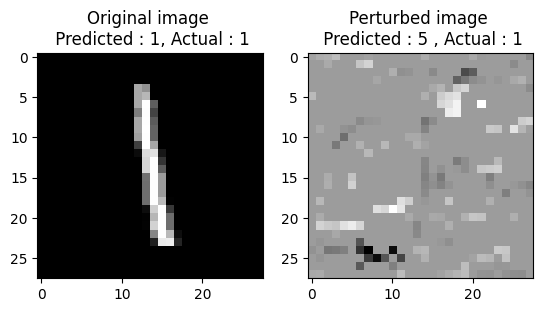

Evaluation took: 0.024936 seconds
1/1 [==============================] - 0s 21ms/step


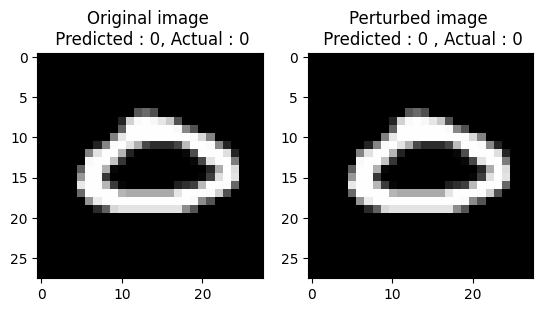

Evaluation took: 0.021913 seconds
1/1 [==============================] - 0s 20ms/step


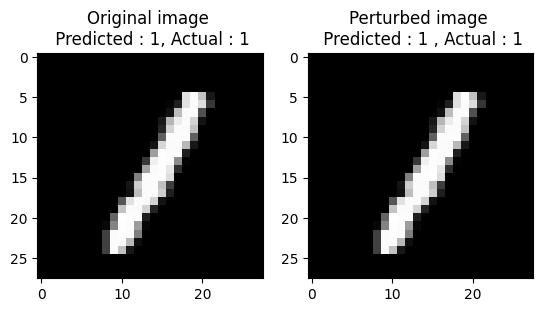

Evaluation took: 0.021943 seconds
1/1 [==============================] - 0s 20ms/step


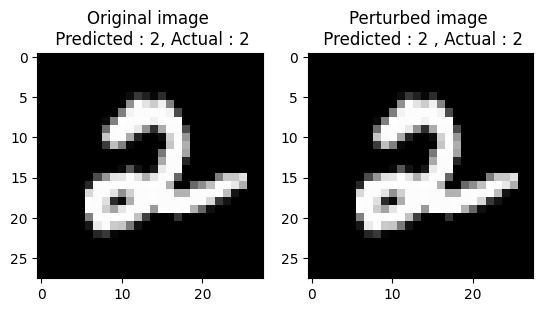

Evaluation took: 3.903954 seconds
1/1 [==============================] - 0s 22ms/step


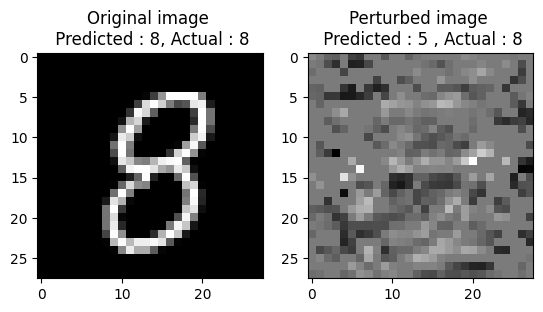

In [134]:
# Инициализируем LBFGS
import tensorflow_probability as tfp
import contextlib
import time

# Приведенные ниже функции (np_value, timed_execution и run) используются 
# для извлечения минимизированных градиентов из оптимизатора lbfgs
def np_value(tensor):
  """Get numpy value out of possibly nested tuple of tensors."""
  if isinstance(tensor, tuple):
    return type(tensor)(*(np_value(t) for t in tensor))
  else:
    return tensor.numpy()

@contextlib.contextmanager
def timed_execution():
  t0 = time.time()
  yield
  dt = time.time() - t0
  print('Evaluation took: %f seconds' % dt)
  
def run(optimizer):
  """Run an optimizer and measure it's evaluation time."""
  optimizer()
  with timed_execution():
    result = optimizer()
  return np_value(result)

  
def LBFGS(model, image, actual_label):
    image = tf.cast(image, tf.float32)
    # первоначальное предположение шум будет равен 0
    x0 = np.zeros(np.prod(image.shape), dtype="float32").reshape(1,28,28,1)	
    # Функция, которая должна быть минимизирована оптимизатором lbfgs, 
    # использующим градиентную ленту для отслеживания градиентов изображения 
    # и получения потерь и связанного с ними градиента изображения, к которому 
    # добавляется некоторый шум.
    def loss_grad(params):
        adversary = tf.cast(image+params,tf.float32)
        with tf.GradientTape() as tape:
            tape.watch(adversary)
            # Используем прогнозы модели для получения потерь
            pred = model(adversary)
            loss = pred[0, actual_label]
        # Вычисляем градиенты потерь для исходного изображения
        gradient = tf.cast(tape.gradient(loss, adversary), tf.float32)
        return loss, gradient
    
    # Вызываем функцию оптимизатора
    def optim():
        return tfp.optimizer.lbfgs_minimize(loss_grad,
                                     initial_position=x0,
                                     tolerance=1e-08)
    # Запускаем оптимизаторы lbfgs и извлекаем тензоры, содержащие минимальное 
    # изменение градиента, что преобразует изображение в состязательный пример
    res = run(optim)
    # .position дает доступ к тензору с минимальным значением градиента 
    # используем это, чтобы добавить шум к исходному изображению
    adversary = image + res.position
    return adversary

# Случайным образом выбераем 5 изображений и запускаем на них fgsm-атаки
for i in random.sample(range(0, x_test_correctly_classified.shape[0]),5):
    image = x_test_correctly_classified[i].reshape(1,28,28,1)
    label = y_test_correctly_classified[i].reshape(1,10)
    actual_label = np.argmax(label)
    perturbed_image = LBFGS(cnn_model,image,actual_label)
    predicted_label = np.argmax(cnn_model.predict(perturbed_image))
    plt.figure()
    plt.subplot(1,2,1)
    plt.title("Original image \n Predicted : {}, Actual : {}".format(np.argmax(label),
                                                   actual_label))
    plt.imshow(np.reshape(x_test_correctly_classified[i],(28,28)), cmap="gray")
    plt.subplot(1,2,2)
    plt.imshow(perturbed_image[0]*0.5+0.5, cmap="gray")
    plt.title("Perturbed image \n Predicted : {} , Actual : {}".format(
                                                            predicted_label,
                                                            actual_label))
    plt.show()

In [135]:
# Протестируем на xgboost последнее изображение, созданное в приведенном выше цикле
xgb_pred = xgb_model.predict(xb.DMatrix(np.reshape(perturbed_image,(1,28*28))))
print("Actual label : {} , Predicted by XGboost : {}".format(actual_label,xgb_pred[0]))

Actual label : 8 , Predicted by XGboost : 0.0


<h4><center><u> Defence against Adversarial Attack </h4></center></u>


<p> Мы можем наблюдать, что после состязательного обучения общая точность данных тестирования снизилась. Один из способов улучшить это - перемешать тестовые данные с состязательными изображениями, а затем проверить точность </p>

In [137]:
# Создаем функцию для создания состязательных изображений
def create_fgsm_examples(model):
    while True:
        adversary_images = []
        adversary_label = []
        # Тренируем на более чем 5000 состязательных изображениях
        index  = random.sample(range(0,x_test.shape[0]), 5000)
        for i in index:
            image = x_test[i].reshape(1,28,28,1)
            label = y_test[i].reshape(1,10)
            adversary = FGSM(model,image, label,eps=0.1)
            # Сохраняем возмущенное изображение в списке
            adversary_images.append(adversary.reshape(28,28,1))
            # Мы используем оригинальную метку, связанную с ним, 
            # и сохраняем ее в списке меток
            adversary_label.append(y_test[i])
    
        yield (np.array(adversary_images), np.array(adversary_label))

(fgsm_images, fgsm_labels) = next(create_fgsm_examples(cnn_model))
(loss, acc) = cnn_model.evaluate(x=fgsm_images, y=fgsm_labels, verbose=0)

print("Loss: {}, Accuracy: {}\n".format(loss, acc))

# Перекомпилируем модель и на этот раз приведем ее в соответствие с созданными примерами
cnn_model.compile(optimizer = cnn_model_opt , loss = "categorical_crossentropy", 
                  metrics=["accuracy"]) 
cnn_model.fit(fgsm_images, fgsm_labels,
              batch_size=128,
              epochs=10)

(loss, acc) = cnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print("Post adversarial training")
print("Loss: {}, Accuracy: {}\n".format(loss, acc))
# Проводим окончательную оценку модели на состязательных изображениях
(loss, acc) = cnn_model.evaluate(x=fgsm_images, y=fgsm_labels, verbose=0)
print("Evaluating on adversarial examples")
print("Loss: {}, Accuracy: {}\n".format(loss, acc))

Loss: 5.5904436111450195, Accuracy: 0.5740000009536743

Epoch 1/10
40/40 [==============================] - 11s 250ms/step - loss: 0.4815 - accuracy: 0.9224
Epoch 2/10
40/40 [==============================] - 10s 250ms/step - loss: 0.0196 - accuracy: 0.9932
Epoch 3/10
40/40 [==============================] - 10s 247ms/step - loss: 0.0058 - accuracy: 0.9984
Epoch 4/10
40/40 [==============================] - 10s 245ms/step - loss: 0.0030 - accuracy: 0.9988
Epoch 5/10
40/40 [==============================] - 10s 250ms/step - loss: 0.0023 - accuracy: 0.9994
Epoch 6/10
40/40 [==============================] - 10s 240ms/step - loss: 6.5318e-04 - accuracy: 0.9998
Epoch 7/10
40/40 [==============================] - 9s 237ms/step - loss: 3.0110e-04 - accuracy: 1.0000
Epoch 8/10
40/40 [==============================] - 10s 239ms/step - loss: 4.7058e-04 - accuracy: 0.9998
Epoch 9/10
40/40 [==============================] - 9s 235ms/step - loss: 1.9478e-04 - accuracy: 1.0000
Epoch 10/10
40/40 [==

In [138]:
# Переобучим модель на состязательных изображениях
new_x_test = np.concatenate([x_test, fgsm_images])
new_y_test = np.concatenate([y_test, fgsm_labels])

# recompile model
cnn_model.compile(optimizer = cnn_model_opt , loss = "categorical_crossentropy", 
                  metrics=["accuracy"]) 
cnn_model.fit(new_x_test, new_y_test,
              batch_size=128,
              epochs=10)

(loss, acc) = cnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print("Post adversarial training with original test images")
print("Loss: {}, Accuracy: {}\n".format(loss, acc))
# Проводим окончательную оценку модели на состязательных изображениях
(loss, acc) = cnn_model.evaluate(x=fgsm_images, y=fgsm_labels, verbose=0)
print("Evaluating on adversarial examples")
print("Loss: {}, Accuracy: {}\n".format(loss, acc))

Epoch 1/10
118/118 [==============================] - 30s 253ms/step - loss: 0.0336 - accuracy: 0.9901
Epoch 2/10
118/118 [==============================] - 29s 249ms/step - loss: 0.0134 - accuracy: 0.9951
Epoch 3/10
118/118 [==============================] - 30s 252ms/step - loss: 0.0058 - accuracy: 0.9979
Epoch 4/10
118/118 [==============================] - 29s 248ms/step - loss: 0.0045 - accuracy: 0.9986
Epoch 5/10
118/118 [==============================] - 29s 245ms/step - loss: 0.0032 - accuracy: 0.9987
Epoch 6/10
118/118 [==============================] - 29s 246ms/step - loss: 0.0021 - accuracy: 0.9993
Epoch 7/10
118/118 [==============================] - 30s 250ms/step - loss: 0.0019 - accuracy: 0.9994
Epoch 8/10
118/118 [==============================] - 29s 249ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 9/10
118/118 [==============================] - 29s 246ms/step - loss: 0.0016 - accuracy: 0.9993
Epoch 10/10
118/118 [==============================] - 29s 249ms/step - l

<h4> APE-GAN </h4>
Выполнение этой части кода занимает более 60 минут (для epoch=10). В итоге мы видим, что модель GAN стабилизировалась с низкими потерями и точностью 1,0

In [140]:
# Инициализируем APE-GAN
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Cнова загрузим набор данных, так как нужно нормализовать тренировочные данные до диапазона [-1,1]
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1)
train_data = np.concatenate([x_train, fgsm_images])
train_data = train_data.reshape(train_data.shape[0],28,28,1).astype('float32')
train_data = (train_data - 127.5)/127.5 

# Создаем модель генератора
def generator_model():
    gen_model = models.Sequential()
    gen_model.add(Dense(7*7*256, use_bias=False, input_shape=(100,)))
    gen_model.add(BatchNormalization())
    gen_model.add(LeakyReLU())
    
    gen_model.add(Reshape((7, 7, 256)))
    assert gen_model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    gen_model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert gen_model.output_shape == (None, 7, 7, 128)
    gen_model.add(BatchNormalization())
    gen_model.add(LeakyReLU())
    
    gen_model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), 
                                  padding='same', use_bias=False))
    assert gen_model.output_shape == (None, 14, 14, 64)
    gen_model.add(BatchNormalization())
    gen_model.add(LeakyReLU())

    gen_model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2),
                                  padding='same', use_bias=False, 
                                  activation='tanh'))
    return gen_model

# Создаем модель дискриминатора
def discriminator_model():
    disc_model = models.Sequential()
    disc_model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    disc_model.add(LeakyReLU())
    disc_model.add(Dropout(0.2))

    disc_model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    disc_model.add(LeakyReLU())
    disc_model.add(Dropout(0.2))

    disc_model.add(Flatten())
    disc_model.add(Dense(1))
    return disc_model

generator = generator_model()
discriminator = discriminator_model()

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

discriminator.compile(loss="binary_crossentropy", optimizer=discriminator_optimizer)
EPOCHS = 10
noise_dim = 100
num_examples_to_generate = 256
BUFFER_SIZE = train_data.shape[0]
BATCH_SIZE = 256

# Начнаем строить модель GAN
# Закрепляем веса дискриминатора
discriminator.trainable = False

test_input = Input(shape=(noise_dim,))
# Объединяем модель генератора и дискриминатора
test_output = discriminator(generator(test_input))

GAN_model = Model(test_input, test_output)
# Используем оптимизатор Adam для GAN
GAN_model.compile(loss="binary_crossentropy", optimizer=discriminator_optimizer,
                  metrics=['accuracy'])
noise = tf.random.normal([256, noise_dim])

# Создаем пакетные данных в обучающем наборе данных
train_data = tf.data.Dataset.from_tensor_slices(train_data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

for epoch in range(EPOCHS):
    print("Epoch {} of {}".format(epoch+1, EPOCHS))
    for image_batch in train_data:
        noise = tf.random.normal([BATCH_SIZE, noise_dim])
        gen_img = generator.predict(noise, verbose=0)
        x = np.concatenate([image_batch, gen_img])
        # Создаем меток как 1 и 0 для дискриминатора, поскольку он должен просто 
        # классифицировать как реальный или поддельный
        y = np.reshape(([1] *int(x.shape[0]/2)) + ([0] * int(x.shape[0]/2)),(-1,))
        # Обучаем дискриминатор как на оригинальных изображениях, так и с шумом
        discriminator_loss = discriminator.train_on_batch(x,y)        
        perturbed_labels = np.reshape([1]* BATCH_SIZE,(-1,))
        # Используем шум для и метки для обучения модели GAN
        GAN_loss = GAN_model.train_on_batch(noise, perturbed_labels)        
    
    print("Discriminator Loss={}, GAN loss={} ".format(discriminator_loss, GAN_loss))


Epoch 1 of 10
Discriminator Loss=0.38146790862083435, GAN loss=[0.0005440235836431384, 1.0] 
Epoch 2 of 10
Discriminator Loss=7.721473693847656, GAN loss=[0.10360819101333618, 0.96875] 
Epoch 3 of 10
Discriminator Loss=7.712473392486572, GAN loss=[15.424945831298828, 0.0] 
Epoch 4 of 10
Discriminator Loss=7.712473392486572, GAN loss=[15.424945831298828, 0.0] 
Epoch 5 of 10
Discriminator Loss=7.712473392486572, GAN loss=[15.424945831298828, 0.0] 
Epoch 6 of 10
Discriminator Loss=7.712473392486572, GAN loss=[15.424945831298828, 0.0] 
Epoch 7 of 10
Discriminator Loss=7.712473392486572, GAN loss=[15.424945831298828, 0.0] 
Epoch 8 of 10
Discriminator Loss=7.712876319885254, GAN loss=[15.299055099487305, 0.0] 
Epoch 9 of 10
Discriminator Loss=7.712473392486572, GAN loss=[15.424945831298828, 0.0] 
Epoch 10 of 10
Discriminator Loss=7.712473392486572, GAN loss=[15.424945831298828, 0.0] 
